Введите промежуток времени от сегодняшнего дня (в днях):


 30


Введите код валюты (например, 'USD', 'EUR', 'GBP'):


 EUR


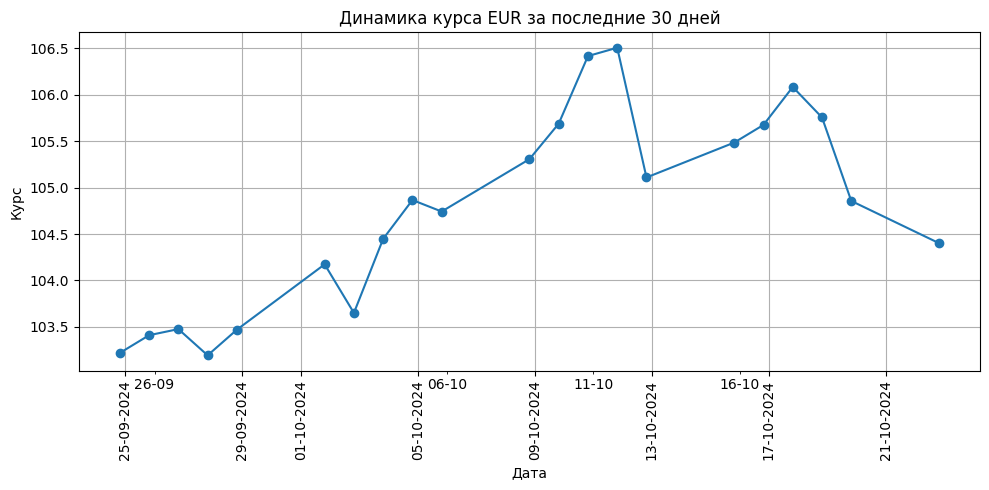

In [2]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

def get_currency_data(date, currency_code='USD'):
    url = f"https://www.cbr-xml-daily.ru/archive/{date.strftime('%Y/%m/%d')}/daily_json.js"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if 'Valute' in data and currency_code in data['Valute']:
            return data['Valute'][currency_code]['Value']
        else:
            print(f"Данные по валюте {currency_code} не найдены на дату {date.strftime('%Y-%m-%d')}")
            return None
    else:
        return None

def plot_currency_trend():
    today = datetime.now()
    
    print("Введите промежуток времени от сегодняшнего дня (в днях):")
    n = int(input())
    print("Введите код валюты (например, 'USD', 'EUR', 'GBP'):")
    currency_code = input().upper()
    
    dates = [today - timedelta(days=i) for i in range(n)]
    
   
    rates = [get_currency_data(date, currency_code) for date in dates]
    
   
    dates_rates = [(date, rate) for date, rate in zip(dates, rates) if rate is not None]

    if dates_rates:
        dates, rates = zip(*dates_rates)
        dates = list(dates)[::-1] 
        rates = list(rates)[::-1]

        plt.figure(figsize=(10, 5))
        plt.plot(dates, rates, marker='o')
        plt.title(f"Динамика курса {currency_code} за последние {n} дней")
        plt.xlabel('Дата')
        plt.ylabel('Курс')
        plt.grid(True)

        plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

        plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=5))
        plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%d-%m'))

        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Нет данных для отображения по валюте {currency_code}")

plot_currency_trend()
